## Team 14
## Ki Bbum Cho
## Xiaocheng Ji
## Steven Simione

# Cancer Classification

In [28]:
#import the needed libraries

import numpy as np
import pandas as pd
import scipy.io
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [29]:
# read the data from mat file, scipy has a function loadmat that does it

data = scipy.io.loadmat('CSE391_classificatin_project.mat')

In [30]:
# Get each goup data and transpose them since patients are the samples and the genes are the features. 
# The transpose was done by putting the X and Y data into numpy arrays first, then put in Pandas DataFrame

X = pd.DataFrame(np.array(data['X']).T)
Y = pd.DataFrame(np.array(data['Y']).T)

# the shape of the X and Y will be the transposed shape of (200,250)

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (250, 200)
Y shape:  (250, 200)


In [31]:
# Create labels for each data set, the zeros are labels for X and ones and labels for Y

xLables = np.zeros(250)
yLables = np.ones(250)

In [32]:
# Concatenate the two data sets and concatenate the labels for the whole data
# data is concatnated by using pandas concat function, the array is done by np.concatenate function

wholeData = pd.concat([X,Y])
wholeDataLabels= np.concatenate([xLables, yLables])

# the total data shape should be (500,200) and the label should be just 250 zeros and 250 ones, in total of (500,)
print("Whole data shape: ", wholeData.shape)
print("Whole data lables shape: ", wholeDataLabels.shape)

Whole data shape:  (500, 200)
Whole data lables shape:  (500,)


In [33]:
# Generate 200 train data and 50 test data from X
# by putting X, xLabels, set the test size of 50 and train size of 200

xtrain, xtest, xtrain_labels, xtest_labels = train_test_split(X, xLables,test_size=50,train_size=200)
print("X train shape: ", xtrain.shape)
print("X test shape: ", xtest.shape)

X train shape:  (200, 200)
X test shape:  (50, 200)


In [34]:
# Gnerate 200 train data and 50 test data from Y
# by putting Y, yLabels, set the test size of 50 and train size of 200

ytrain, ytest, ytrain_labels, ytest_labels = train_test_split(Y ,yLables,test_size=50,train_size=200,random_state=42)
print("Y train shape: ", xtrain.shape)
print("Y test shape: ", xtest.shape)

Y train shape:  (200, 200)
Y test shape:  (50, 200)


In [35]:
# Combine X and Y train data and lables

combinedTrain = pd.concat([xtrain,ytrain],axis=0)
combinedTrainLabels = np.concatenate([xtrain_labels, ytrain_labels])

# print the shape for combinedTrain

print("Train data shape: ", combinedTrain.shape)
print("Train labels shape: ", combinedTrainLabels.shape)

Train data shape:  (400, 200)
Train labels shape:  (400,)


In [36]:
# Combine X and Y test data and lables

combinedTest = pd.concat([xtest,ytest],axis=0)
combinedTestLabels = np.concatenate([xtest_labels,ytest_labels])

# print the shape for combinedTest

print("Test data shape: ", combinedTest.shape)
print("Test Labels shape: ", combinedTestLabels.shape)

Test data shape:  (100, 200)
Test Labels shape:  (100,)


In [37]:
# Classifier 1= Use Random Forest Classfier

clf = RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
# Train with our train data

clf.fit(combinedTrain, combinedTrainLabels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
# Predict the test data

y_pred = clf.predict(combinedTest)
print("Predict result: ", clf.predict(combinedTest))

Predict result:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [40]:
# printing the importances

print(clf.feature_importances_)

[0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.  0.
 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]


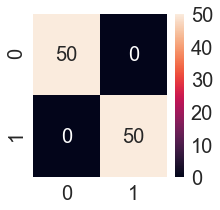

In [41]:
# Print the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn

cnf_matrix = confusion_matrix(combinedTestLabels, y_pred)

df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
plt.figure(figsize = (3 ,3))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size
plt.show()

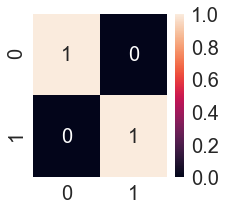

In [42]:
# normalized confusion matrix

cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
plt.figure(figsize = (3 ,3))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size
plt.show()

In [43]:
#Getting the stats, comparing the values

from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(combinedTestLabels, y_pred)

# printing the stats, FDR, F1 values

cm.print_stats()

population: 100
P: 50
N: 50
PositiveTest: 50
NegativeTest: 50
TP: 50
TN: 50
FP: 0
FN: 0
TPR: 1.0
TNR: 1.0
PPV: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
ACC: 1.0
F1_score: 1.0
MCC: 1.0
informedness: 1.0
markedness: 1.0
prevalence: 0.5
LRP: inf
LRN: 0.0
DOR: inf
FOR: 0.0


/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [44]:
# do 5-fold cross validation and get accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, wholeData, wholeDataLabels, cv=5)
print(scores)
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
Accuracy: 1.00 ( 0.00)


In [45]:
# Classifier 2= Use SVC classifier

from sklearn.svm import SVC
svc_clf = SVC()
clf.fit(combinedTrain, combinedTrainLabels)

# Predict the test data

y_pred = clf.predict(combinedTest)
print("Predict result: ", clf.predict(combinedTest))

Predict result:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


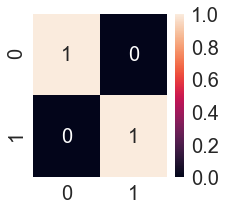

In [46]:
# Print the normalized confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
cnf_matrix = confusion_matrix(combinedTestLabels, y_pred)
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
plt.figure(figsize = (3 ,3))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size
plt.show()

In [47]:
#Getting the stats, comparing the values

from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(combinedTestLabels, y_pred)

# printing the stats, FDR, F1 values

cm.print_stats()

population: 100
P: 50
N: 50
PositiveTest: 50
NegativeTest: 50
TP: 50
TN: 50
FP: 0
FN: 0
TPR: 1.0
TNR: 1.0
PPV: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
ACC: 1.0
F1_score: 1.0
MCC: 1.0
informedness: 1.0
markedness: 1.0
prevalence: 0.5
LRP: inf
LRN: 0.0
DOR: inf
FOR: 0.0


/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [48]:
# do 5-fold cross validation and get the accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_clf, wholeData, wholeDataLabels, cv=5)
print(scores)
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99 0.97 0.93 0.92 0.95]
Accuracy: 0.95 ( 0.05)


In [49]:
# Classifier 3= Use GaussianNB classifier

clf = GaussianNB()
clf.fit(combinedTrain, combinedTrainLabels)

# Predict the test data

y_pred = clf.predict(combinedTest)
print("Predict result: ", clf.predict(combinedTest))

Predict result:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


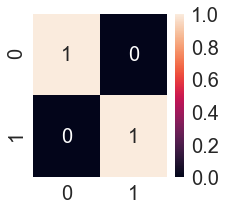

In [50]:
# Print the normalized confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
cnf_matrix = confusion_matrix(combinedTestLabels, y_pred)
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
plt.figure(figsize = (3 ,3))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size
plt.show()

In [51]:
#Getting the stats, comparing the values

from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(combinedTestLabels, y_pred)

# printing the stats, FDR, F1 values

cm.print_stats()

population: 100
P: 50
N: 50
PositiveTest: 50
NegativeTest: 50
TP: 50
TN: 50
FP: 0
FN: 0
TPR: 1.0
TNR: 1.0
PPV: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
ACC: 1.0
F1_score: 1.0
MCC: 1.0
informedness: 1.0
markedness: 1.0
prevalence: 0.5
LRP: inf
LRN: 0.0
DOR: inf
FOR: 0.0


/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [52]:
# do 5-fold cross validation and get the accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, wholeData, wholeDataLabels, cv=5)
print(scores)
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
Accuracy: 1.00 ( 0.00)
